# Measure regionprops plugin

Create a plugin to profile morphological features from cells. The plugin should enable users to:

1) Read an image stack
2) Segment cells
3) Measure image features of each cell
4) Store the result as a CSV file 

In [2]:
from skimage import data
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import numpy as np

import napari
from magicgui import magicgui

from napari.layers import Image
from napari.types import LabelsData
import pathlib

## Load sample data

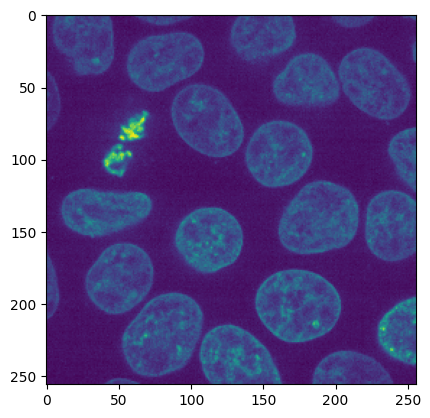

In [158]:
IMAGE2D = data.cells3d()[30,1]

plt.imshow(IMAGE2D)

## Define plugin functions

In [144]:
def segment_cells(img):

    # Segment cells with Cellpose
    
    return mask

def get_properties(mask, img):

    # Measure regionprops with scikit-image
    
    return region_properties
    
def save_props_table(props, mask, properties, path):

    # Save your measured regionprops as a CSV file with pandas

## Magicgui implementation

In [154]:
@magicgui(
    # Define a FileEdit widget to select path
)
def measure_regionprops(
    # Define the following arguments: img, path, [properties]
):

    # Store selected properties

    # Execute plugin functions
    mask = segment_cells(  )
    props = get_properties(  )
    save_props_table(  )
    

viewer = napari.view_image(IMAGE2D)
viewer.window.add_dock_widget(measure_regionprops)

## Magic Factory Implementation

In [155]:
from magicgui import magic_factory   

def on_init(widget):
    properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean', 'properties_header']

    for x in properties:
        setattr(getattr(widget, x), 'visible', False)

    def toggle_show_properties(show_properties: bool):
        if show_properties:
            for x in properties:
                setattr(getattr(widget, x), 'visible', True)  
        else:
            for x in properties:
                setattr(getattr(widget, x), 'visible', False)      

    widget.show_properties.changed.connect(toggle_show_properties)
    
@magic_factory(
    widget_init=on_init, layout='vertical', call_button='Measure',
    widget_header={'widget_type': 'Label',
                   'label': f'<h1 text-align="left">Measure Region Properties</h1>'},
    img={'label': 'Input image'},
    path={'label': 'Save as',
          'widget_type': 'FileEdit',
          'mode': 'r',
          'filter': '*.csv'},
    show_properties={'label': 'Select properties',
                     'widget_type': 'CheckBox',
                     'value': False},
    properties_header={'widget_type': 'Label',
                       'label': f'<h3 text-align="left">Select Region Properties</h3>'},
    area={'label': 'Area',
          'widget_type': 'CheckBox',
          'value': True},
    eccentricity={'label': 'Eccentricity',
                  'widget_type': 'CheckBox',
                  'value': True},
    perimeter={'label': 'Perimeter',
               'widget_type': 'CheckBox',
               'value': True},
    intensity_mean={'label': 'Mean intensity',
                    'widget_type': 'CheckBox',
                    'value': True}
)
def measure_regionprops(
    viewer: 'napari.viewer.Viewer',
    widget_header,
    img: 'napari.layers.Image',
    path,
    show_properties,
    properties_header,
    area,
    eccentricity,
    perimeter,
    intensity_mean
):

    properties = []
    
    if area:
        properties.append('area')
    if eccentricity:
        properties.append('eccentricity')
    if perimeter:
        properties.append('perimeter')
    if intensity_mean:
        properties.append('intensity_mean')

    
    mask = segment_cells(img.data)

    viewer.add_labels(mask)
    
    props = get_properties(mask, img.data)
    save_props_table(props, mask, properties, path)    
    
viewer = napari.view_image(IMAGE2D)
widget = measure_regionprops()
viewer.window.add_dock_widget(widget)